In [119]:
#hide
!pip install fastbook
import fastbook
fastbook.setup_book()

In [264]:
#hide
from fastai.vision.all import *
from fastbook import *

### Multiclass classification

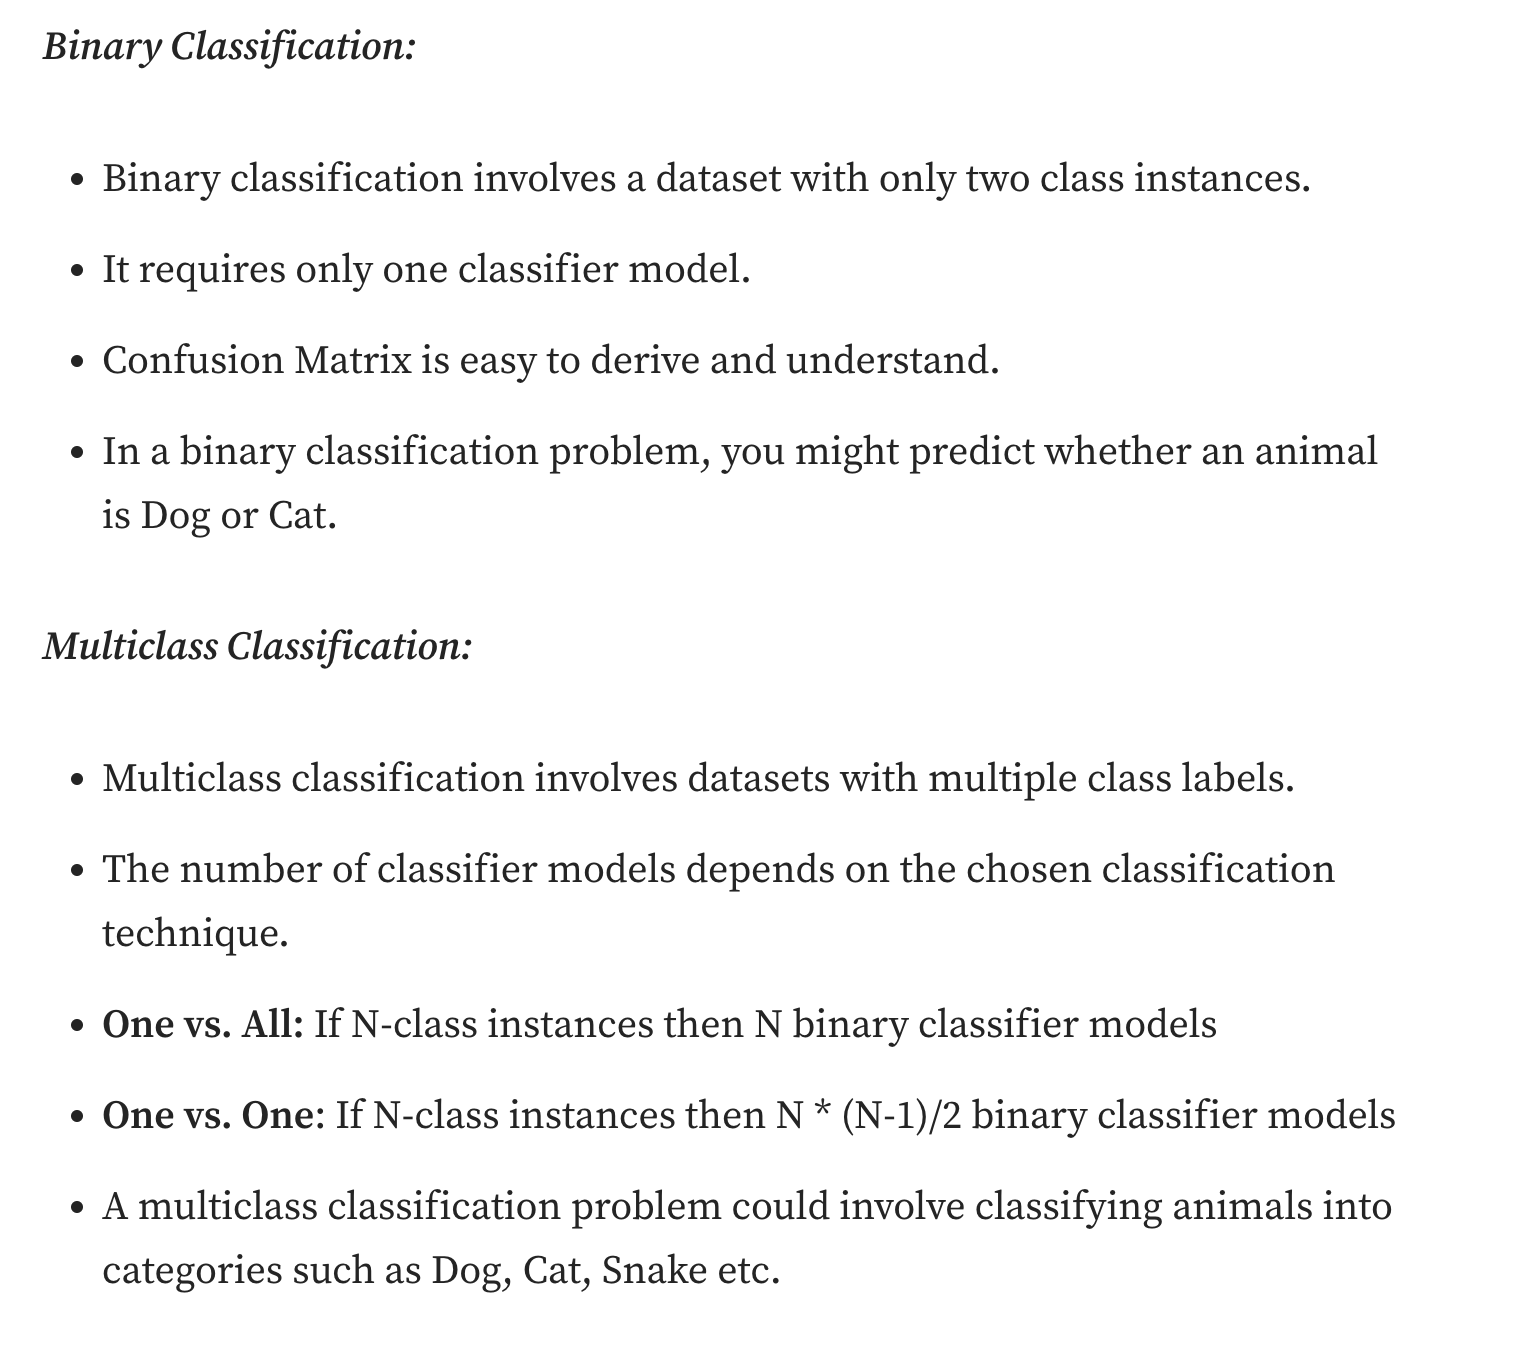

### Download whole dataset
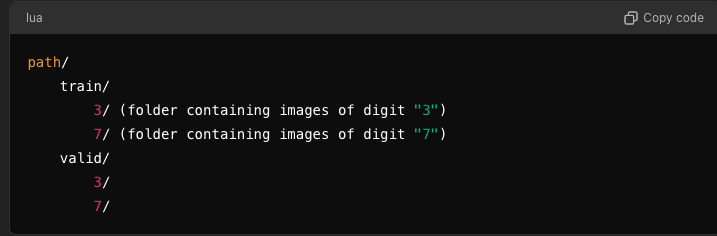

In [156]:
path = untar_data(URLs.MNIST)
path.ls()

(#2) [Path('training'),Path('testing')]

### Set the base and training path

In [173]:
Path.BASE_PATH = path
training_path = path/'training'
validation_path = path/'testing'

In [225]:
training_path.ls()

(#10) [Path('training/9'),Path('training/0'),Path('training/7'),Path('training/6'),Path('training/1'),Path('training/8'),Path('training/4'),Path('training/3'),Path('training/2'),Path('training/5')]

### Create path variable for each digit

In [158]:
ones = (training_path/'1').ls().sorted()
ones

(#6742) [Path('training/1/10006.png'),Path('training/1/10007.png'),Path('training/1/1002.png'),Path('training/1/10020.png'),Path('training/1/10027.png'),Path('training/1/1003.png'),Path('training/1/10040.png'),Path('training/1/10048.png'),Path('training/1/10058.png'),Path('training/1/10067.png')...]

In [178]:
# Check if load was successful
im1_path = ones[1]
im1 = Image.open(im1_path)
im1

In [179]:
def create_path_variable(path, digit):
    return (path/digit).ls().sorted()

In [281]:
zeros = create_path_variable(training_path, '0')
ones = create_path_variable(training_path, '1')
twos = create_path_variable(training_path, '2')
threes = create_path_variable(training_path, '3')
fours = create_path_variable(training_path, '4')
fives = create_path_variable(training_path, '5')
sixes = create_path_variable(training_path, '6')
sevens = create_path_variable(training_path, '7')
eights = create_path_variable(training_path, '8')
nines = create_path_variable(training_path, '9')
len(nines)

5949

In [284]:
# Calculate the total number of samples across all digit classes
total_samples = sum([
    len(zeros), 
    len(ones), 
    len(twos), 
    len(threes), 
    len(fours), 
    len(fives), 
    len(sixes), 
    len(sevens), 
    len(eights), 
    len(nines)
])
total_samples

60000

### Load digits into the tensor

In [285]:
def create_tensors_from_digits(path):
    return [tensor(Image.open(o)) for o in path]

In [286]:
zero_tensors = create_tensors_from_digits(zeros)
one_tensors = create_tensors_from_digits(ones)
two_tensors = create_tensors_from_digits(twos)
three_tensors = create_tensors_from_digits(threes)
four_tensors = create_tensors_from_digits(fours)
five_tensors = create_tensors_from_digits(fives)
six_tensors = create_tensors_from_digits(sixes)
seven_tensors = create_tensors_from_digits(sevens)
eight_tensors = create_tensors_from_digits(eights)
nine_tensors = create_tensors_from_digits(nines)
len(nine_tensors)

5949

<Axes: >

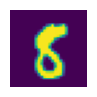

In [184]:
show_image(eight_tensors[43])

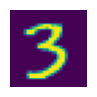

In [185]:
show_image(three_tensors[1]);

### Stack tensors together and normalize it

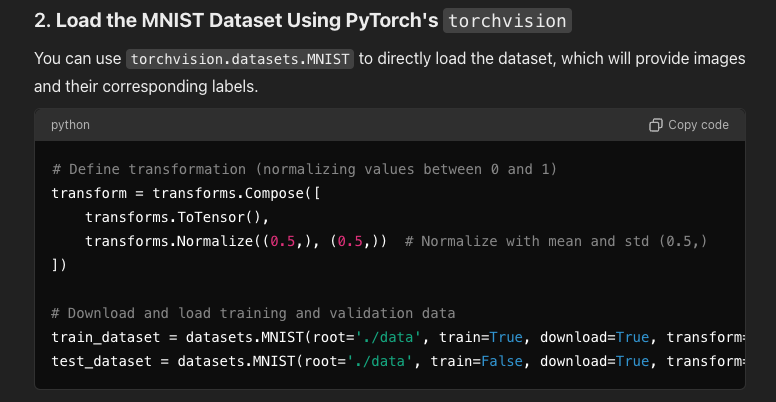

Combine the list of tensors into a single tensor by adding an extra dimension, convert it to float and normalize it by 255 (values of pixels from 0-255 to 0-1)

In [422]:
stacked_zeros = torch.stack(zero_tensors).float()/255
stacked_ones = torch.stack(one_tensors).float()/255
stacked_twos = torch.stack(two_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255
stacked_fours = torch.stack(four_tensors).float()/255
stacked_fives = torch.stack(five_tensors).float()/255
stacked_sixes = torch.stack(six_tensors).float()/255
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_eights = torch.stack(eight_tensors).float()/255
stacked_nines = torch.stack(nine_tensors).float()/255

### Upload and stack validation set

In [423]:
zeros_valid = create_tensors_from_digits(create_path_variable(validation_path, '0'))
ones_valid = create_tensors_from_digits(create_path_variable(validation_path, '1'))
twos_valid = create_tensors_from_digits(create_path_variable(validation_path, '2'))
threes_valid = create_tensors_from_digits(create_path_variable(validation_path, '3'))
fours_valid = create_tensors_from_digits(create_path_variable(validation_path, '4'))
fives_valid = create_tensors_from_digits(create_path_variable(validation_path, '5'))
sixes_valid = create_tensors_from_digits(create_path_variable(validation_path, '6'))
sevens_valid = create_tensors_from_digits(create_path_variable(validation_path, '7'))
eights_valid = create_tensors_from_digits(create_path_variable(validation_path, '8'))
nines_valid = create_tensors_from_digits(create_path_variable(validation_path, '9'))

In [424]:
one_tensors_valid = torch.stack(ones_valid).float()/255
one_tensors_valid.shape

torch.Size([1135, 28, 28])

In [425]:
zero_tensors_valid = torch.stack(zeros_valid).float()/255
two_tensors_valid = torch.stack(twos_valid).float()/255
three_tensors_valid = torch.stack(threes_valid).float()/255
four_tensors_valid = torch.stack(fours_valid).float()/255
five_tensors_valid = torch.stack(fives_valid).float()/255
six_tensors_valid = torch.stack(sixes_valid).float()/255
seven_tensors_valid = torch.stack(sevens_valid).float()/255
eight_tensors_valid = torch.stack(eights_valid).float()/255
nine_tensors_valid = torch.stack(nines_valid).float()/255
nine_tensors_valid.shape

torch.Size([1009, 28, 28])

### Create mean-digit (average) for every digit

In [426]:
mean1 = stacked_ones.mean(0)
mean2 = stacked_twos.mean(0)
mean3 = stacked_threes.mean(0)
mean4 = stacked_fours.mean(0)
mean5 = stacked_fives.mean(0)
mean6 = stacked_sixes.mean(0)
mean7 = stacked_sevens.mean(0)
mean8 = stacked_eights.mean(0)
mean9 = stacked_nines.mean(0)


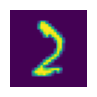

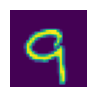

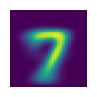

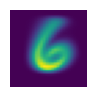

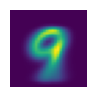

In [427]:
show_image(stacked_twos[3888]);
show_image(stacked_nines[222]);
show_image(mean7);
show_image(mean6);
show_image(mean9);

### Transform digits and combine them: Why Use This Transformation?
Neural networks, particularly fully connected layers, often **expect input in a flat, vectorized format.** By reshaping each 28x28 image into a 784-element vector, the data can be fed directly into the network.

The resulting tensor vector will have dimensions [NX, 784], where each row is flattened 20*28 image, NX is number of all images altogether

### Create training and validation data train_x, train_y, valid_x, valid_y

In [446]:
stacked_digits = torch.cat([stacked_zeros, stacked_ones, stacked_twos, stacked_threes, stacked_fours, stacked_fives, stacked_sixes, stacked_sevens, stacked_eights, stacked_nines]) 
train_x = stacked_digits.view(-1, 28*28)  # view reshapes he tensor 28*28 into 784 element vector 
train_x.shape

torch.Size([60000, 784])

In [447]:
train_y = tensor([0]*len(zeros) + [1]*len(ones) + [2]*len(twos) + [3]*len(threes) + [4]*len(fours)+ [5]*len(fives) + [6]*len(sixes) + [7]*len(sevens) + [8]*len(eights) + [9]*len(nines)) # unsqueeze not used here
train_y = train_y.long()  # Convert to long type for cross-entropy loss
train_y.shape

torch.Size([60000])

In [448]:
stacked_digits_valid = torch.cat([zero_tensors_valid, one_tensors_valid, two_tensors_valid, three_tensors_valid, four_tensors_valid, five_tensors_valid, six_tensors_valid, seven_tensors_valid, eight_tensors_valid, nine_tensors_valid])  # cat connectates tensors along specified dimension, here the first dimension represents number of images
valid_x = stacked_digits_valid.view(-1, 28*28)
valid_x.shape

torch.Size([10000, 784])

In [449]:
valid_y = tensor([0]*len(zeros_valid) + [1]*len(ones_valid) + [2]*len(twos_valid) + [3]*len(threes_valid) + [4]*len(fours_valid)+ [5]*len(fives_valid) + [6]*len(sixes_valid) + [7]*len(sevens_valid) + [8]*len(eights_valid) + [9]*len(nines_valid)) # unsqueeze(1) not used here
valid_y = valid_y.long()  # Convert to long type for cross-entropy loss
valid_y.shape

torch.Size([10000])

### Check dataset

In [527]:
print(f'stacked_zeros.shape: {stacked_zeros.shape}')
print(f'stacked_digits.shape: {stacked_digits.shape}')
print(f'train_x.shape: {train_x.shape}')
print(f'train_y.shape: {train_y.shape}')

stacked_zeros.shape: torch.Size([5923, 28, 28])
stacked_digits.shape: torch.Size([60000, 28, 28])
train_x.shape: torch.Size([60000, 784])
train_y.shape: torch.Size([60000])


In [528]:
from collections import Counter
label_counts = Counter(train_y.numpy())
print(label_counts)

Counter({1: 6742, 7: 6265, 3: 6131, 2: 5958, 9: 5949, 0: 5923, 6: 5918, 8: 5851, 4: 5842, 5: 5421})


### Create dataset object for training and validation data

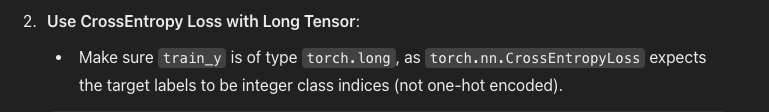

In [450]:
dset = list(zip(train_x, train_y))

In [451]:
dset_valid = list(zip(valid_x, valid_y))

### Create dataloader objects for train and the validation set

In [452]:
dl = DataLoader(dset, batch_size=256, shuffle=True)
xb, yb = first(dl)
xb.shape, yb.shape

(torch.Size([256, 784]), torch.Size([256]))

In [453]:
dl_valid = DataLoader(dset_valid, batch_size=256)
xb, yb = first(dl_valid)

In [454]:
dls = DataLoaders(dl, dl_valid)

### Create simple neural network

Notes:

* **Input size** should be the size of the flatten image **28*28 = 784**
*  **Hidden layer** could be **128, 256, 512** - experiment
* **Output size** should be **10**  for the 10 classes: **digits 0-9**

* **Loss Function**: The **cross-entropy** function is better for multiple categories than ReLU

* **SGD** now we are using our own omplementation but using **Adam** or other well known optimizers could improve model, or using good learning rate
$$optimizer = torch.optim.Adam(model.parameters(), lr=0.001)  # or try lr=0.0001$$

* **Multi categories problem**: In $forward$ function you should use **softmax** at the output layer.
* **softmax** converts raw output scores (logits) into probabilities for each class, importatn when using cross entropy fn


In [397]:
!pip install torch

In [398]:
import torch
import torch.nn as nn

In [437]:
## Manual optimizer and linear funciton

    # def sgd(self):
    #     with torch.no_grad():  # Don't track gradients during parameter update
    #         for param in self.parameters():
    #             param -= self.lr*param.grad

    #     # Zero out the gradients
    #     for param in self.parameters():
    #         if param.grad is not None:
    #             param.grad.zero_()

    
    # Forward pass with no non-linearity on the final layer (softmax will be applied in the loss function)
    # def forward_pass(self, x):
    #     preds = x @ self.weights + self.bias  # Linear transformation
    #     return preds


In [455]:
class Model(nn.Module):
    def __init__(self, input_size, hidden_size, output_size=10, lr=0.01):
        super(Model, self).__init__()
        
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(0.5)
        self.output = nn.Linear(hidden_size, output_size)
        
        self.lr = lr  # Learning rate
        
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.dropout1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.dropout2(x)
        x = self.output(x)
        return x

    # Use CrossEntropyLoss instead of ReLU for multi-class classification
    def loss_cross_entropy(self, predictions, targets):
        return F.cross_entropy(predictions, targets)
    
    def train_model(self, x, y, optimizer):
        preds = self.forward(x) # x represents input data
        loss = self.loss_cross_entropy(preds, y) # y represents target values
        loss.backward()  # Backpropagate the gradients
        optimizer.step()  # Update weights
        self.zero_grad()  # Reset gradients after each update
        return loss.item()  # loss value for monitoring

    def batch_accuracy(self, xb, yb):
        preds = self.forward(xb)
        predicted_labels = preds.argmax(dim=1)  # Get the index of the highest logit
        correct = (predicted_labels == yb).float().mean()  # Compare with target labels
        return correct

### Initialize the Model

In [494]:
# Initialize the model
input_size = 784  # For MNIST, each image is 28x28 = 784
hidden_size = 128  # Can experiment with this size
output_size = 10  # 10 classes for digits 0-9
lr = 0.01

model = Model(input_size, hidden_size, output_size, lr)

#### create optimizer

In [495]:
import torch.optim as optim

# Optimizer using Stochastic Gradient Descent
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [500]:
epochs = 20
for epoch in range(epochs):
    model.train()  # Set the model to training mode
    loss = model.train_model(train_x, train_y, optimizer)
    print(f'Epoch {epoch+1}/{epochs}, Loss: {loss}')

    # Example validation accuracy check
    model.eval()  # Set model to evaluation mode
    with torch.no_grad():  # Disable gradient computation
        accuracy = model.batch_accuracy(valid_x, valid_y)
        print(f'Validation Accuracy: {accuracy.item()}\n')


Epoch 1/20, Loss: 0.25841447710990906
Validation Accuracy: 0.949400007724762

Epoch 2/20, Loss: 0.25524187088012695
Validation Accuracy: 0.9501000046730042

Epoch 3/20, Loss: 0.2549508810043335
Validation Accuracy: 0.9502999782562256

Epoch 4/20, Loss: 0.2562376856803894
Validation Accuracy: 0.9505000114440918

Epoch 5/20, Loss: 0.2544442117214203
Validation Accuracy: 0.9508000016212463

Epoch 6/20, Loss: 0.25418511033058167
Validation Accuracy: 0.951200008392334

Epoch 7/20, Loss: 0.252867728471756
Validation Accuracy: 0.9514999985694885

Epoch 8/20, Loss: 0.2526598274707794
Validation Accuracy: 0.951200008392334

Epoch 9/20, Loss: 0.24922865629196167
Validation Accuracy: 0.9513000249862671

Epoch 10/20, Loss: 0.24770872294902802
Validation Accuracy: 0.9513000249862671

Epoch 11/20, Loss: 0.2480730563402176
Validation Accuracy: 0.9509999752044678

Epoch 12/20, Loss: 0.24726282060146332
Validation Accuracy: 0.9510999917984009

Epoch 13/20, Loss: 0.24834094941616058
Validation Accuracy:

### Save trained model

In [502]:
import torch

# Assuming 'model' is your trained model
torch.save({
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'epoch': epoch,
    'loss': loss,
}, 'model_full.pth')

### Load the model - interference

In [515]:
ls

digit_recognizer.ipynb    micrograd_graphviz.ipynb
learner.ipynb             model_full.pth


In [516]:
# Initialize the model (make sure it has the same architecture as before)
model = Model(input_size=784, hidden_size=128, output_size=10)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Load the saved state
checkpoint = torch.load('model_full.pth')
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
epoch = checkpoint['epoch']
loss = checkpoint['loss']

# Set the model to evaluation mode (if you are just doing inference)
model.eval()

Model(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (relu1): ReLU()
  (dropout1): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=128, out_features=128, bias=True)
  (relu2): ReLU()
  (dropout2): Dropout(p=0.5, inplace=False)
  (output): Linear(in_features=128, out_features=10, bias=True)
)

### Create Interference

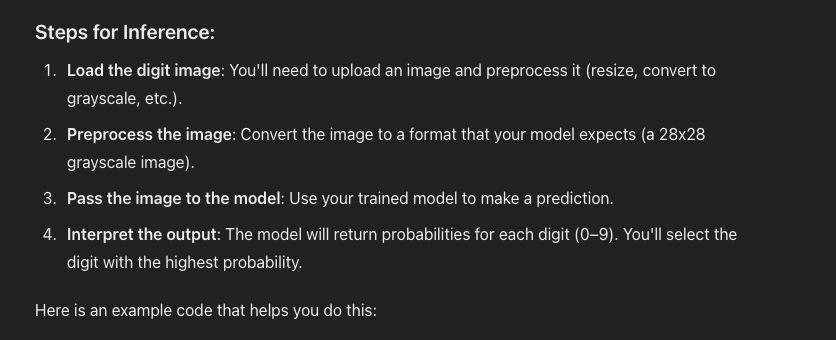

### Load and preprocces image

In [517]:
from PIL import Image
import torch
import torchvision.transforms as transforms

# Load the image file (you can provide the path to your digit image)
def load_image(image_path):
    img = Image.open(image_path).convert('L')  # Convert image to grayscale
    return img

def preprocess_image(image):
    transform = transforms.Compose([
        transforms.Resize((28, 28)),
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))  # Normalize mean 0.5, std 0.5
    ])
    img_tensor = transform(image)
    img_tensor = img_tensor.view(-1, 28*28)  # Flatten the image
    return img_tensor

### Inference evaluation

In [530]:
def predict(model, img_tensor):
    model.eval()  # set the model to the evaluation mode
    with torch.no_grad():
        output = model(img_tensor)  # Forward pass
        print("Output (Logits):", output)  # Print logits

        # Apply softmax to convert logits to probabilities (optional, for understanding)
        probabilities = F.softmax(output, dim=1)
        print("Probabilities:", probabilities)
        
        prediction = torch.argmax(output, dim=1)  # Get the predicted image
        print("Predicted Index:", prediction.item())

        # Assuming label_map is a list where index corresponds to the label
        label_map = [str(i) for i in range(10)]  # Example for digits 0-9
        label = label_map[prediction.item()]
        print("Predicted Digit:", label)
        
        return label
        

In [531]:
def show_image(img_tensor):
    # Ensure the tensor is on CPU and convert to NumPy array
    img = img_tensor.cpu().numpy()
    
    # Reshape to 2D (28, 28) for grayscale images
    img = img.reshape(28, 28)
    
    # Display the image
    plt.imshow(img, cmap='gray')
    plt.axis('off')  # Hide the axes for cleaner visualization
    plt.show()

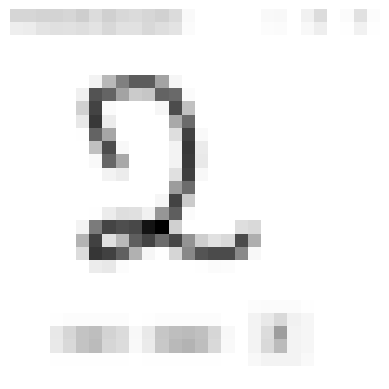

Output (Logits): tensor([[ -2.9908,  -4.6224,   5.0790,  20.3849, -21.8397,  12.9185,  -8.8488,   4.5494,  -7.9563,  -8.1133]])
Probabilities: tensor([[7.0440e-11, 1.3778e-11, 2.2516e-07, 9.9943e-01, 4.5901e-19, 5.7167e-04, 2.0123e-13, 1.3258e-07, 4.9124e-13, 4.1989e-13]])
Predicted Index: 3
Predicted Digit: 3
The predicted digit is: 3


In [535]:
img_path = "/Users/dagmarmac/edu/fastai/lesson3/digits/2.1.jpg"
img = load_image(img_path)
img_tensor = preprocess_image(img)

show_image(img_tensor)

prediction = predict(model, img_tensor)

print(f'The predicted digit is: {prediction}')
